<a href="https://colab.research.google.com/github/yashps7/Feynn_ProductIdeation/blob/main/PosturePal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install mediapipe
!wget https://raw.githubusercontent.com/spmallick/learnopencv/blob/master/Posture-analysis-system-using-MediaPipe-Pose/input.mp4
!pip install opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import cv2
import time
import math as m
import mediapipe as mp
from google.colab.patches import cv2_imshow
import os

In [ ]:
# Initilize medipipe selfie segmentation class.
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

In [ ]:
def findDistance(x1, y1, x2, y2):
    dist = m.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

In [ ]:
# Calculate angle.
def findAngle(x1, y1, x2, y2):
    theta = m.acos((y2 -y1)*(-y1) / (m.sqrt((x2 - x1)**2 + (y2 - y1)**2) * y1))
    degree = int(180/m.pi)*theta
    return degree

In [ ]:
def sendWarning():
    print('YOU ARE IN WRONG POSITION FOR LONG TIME')

In [ ]:
# Initilize frame counters.
good_frames = 0
bad_frames = 0
font = cv2.FONT_HERSHEY_SIMPLEX

blue = (255, 127, 0)
red = (50, 50, 255)
green = (127, 255, 0)
dark_blue = (127, 20, 0)
light_green = (127, 233, 100)
yellow = (0, 255, 255)
pink = (255, 0, 255)

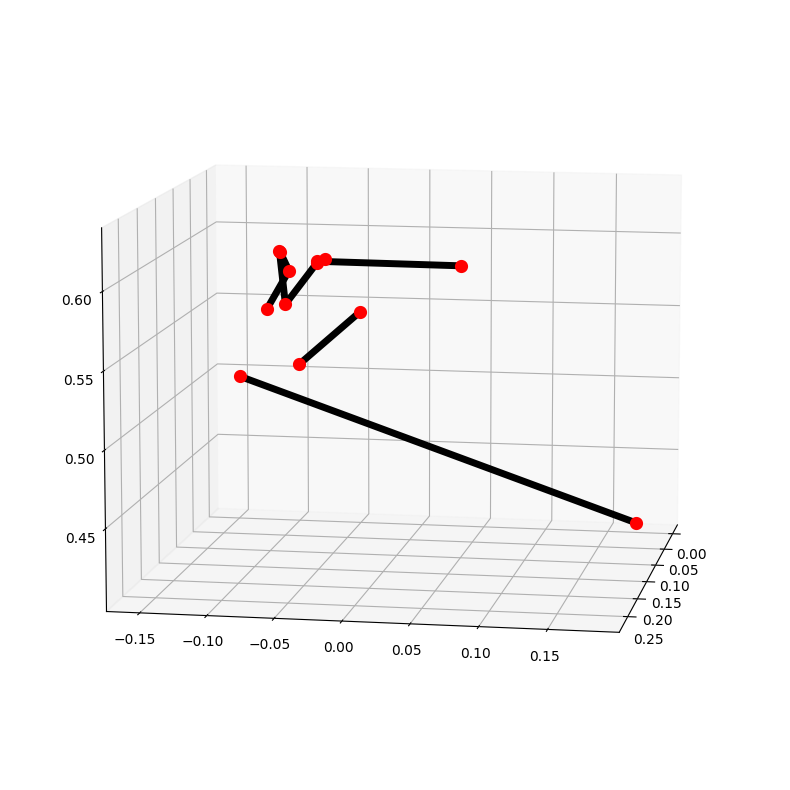

z: -604.6965789794922


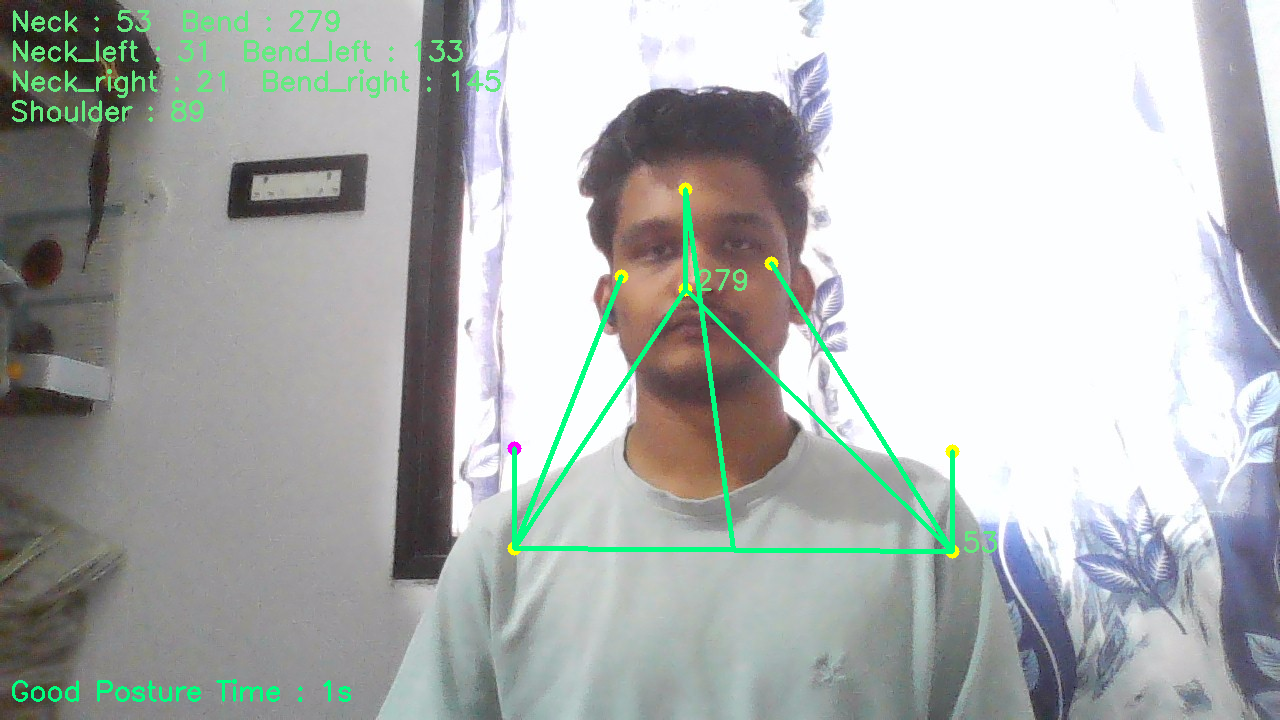

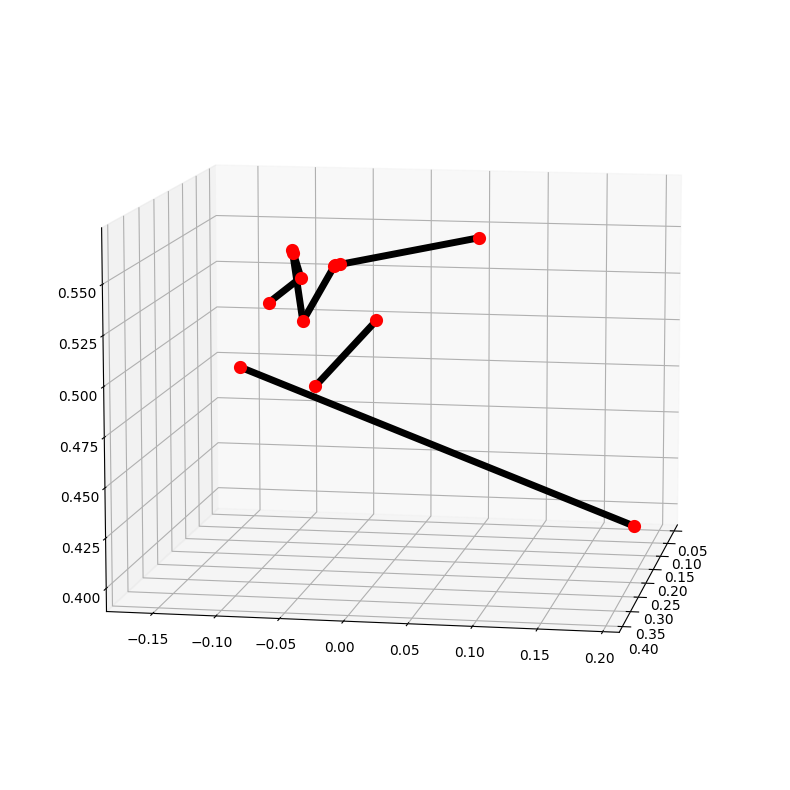

z: -1410.1278686523438
YOU ARE IN WRONG POSITION FOR LONG TIME


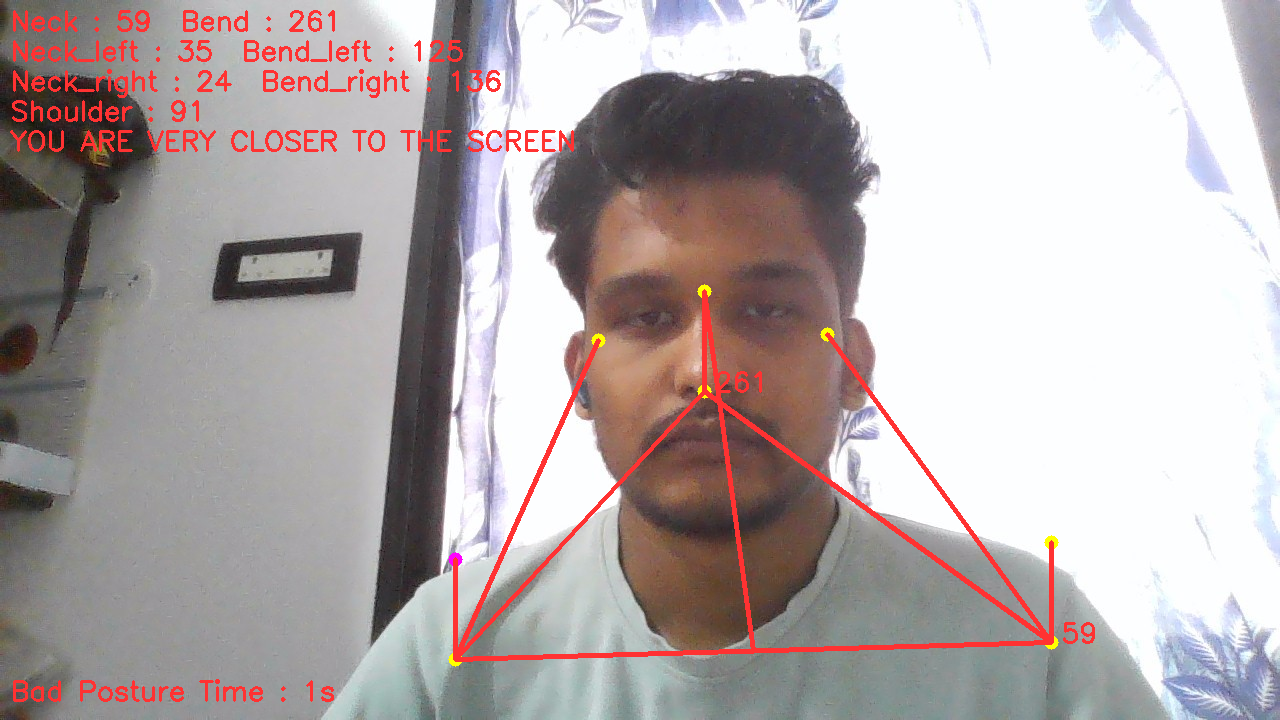

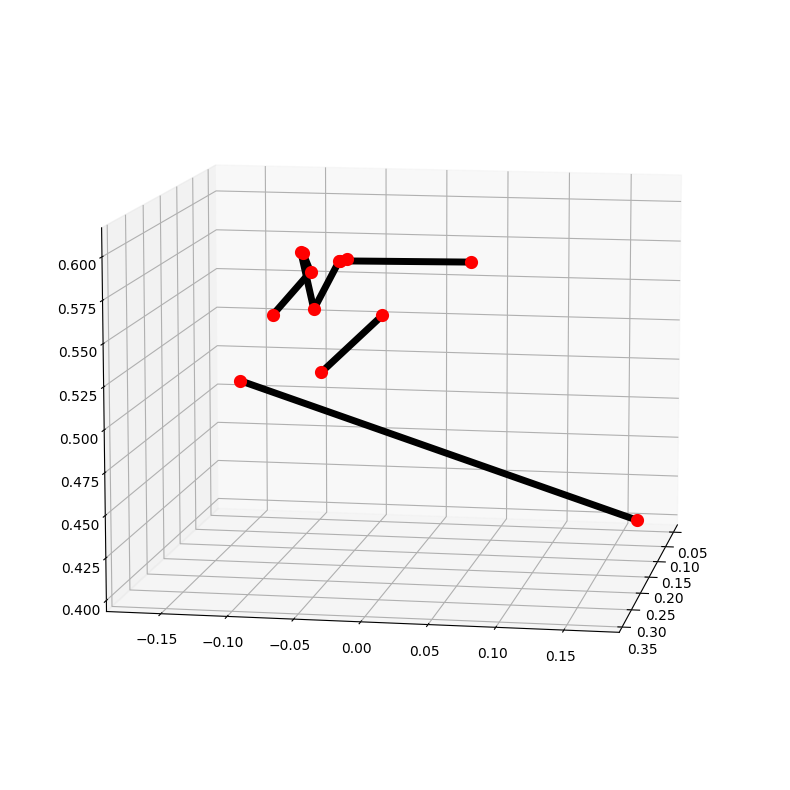

z: -797.4952697753906


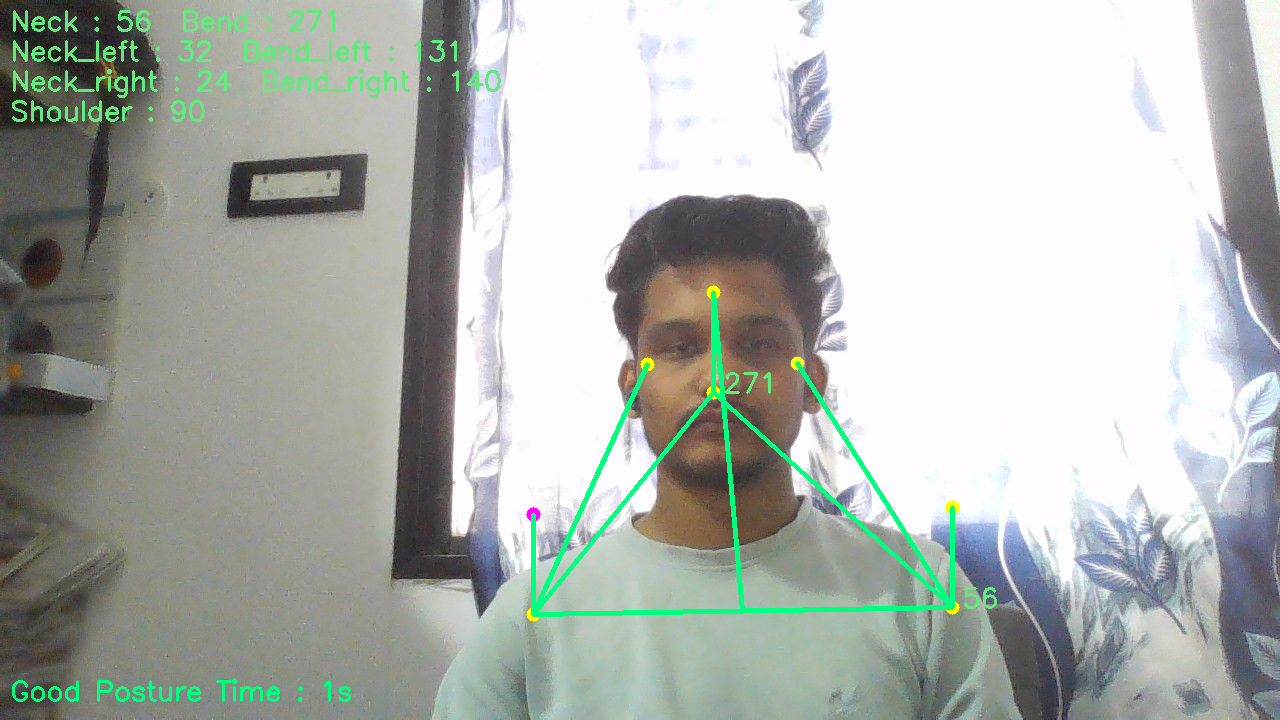

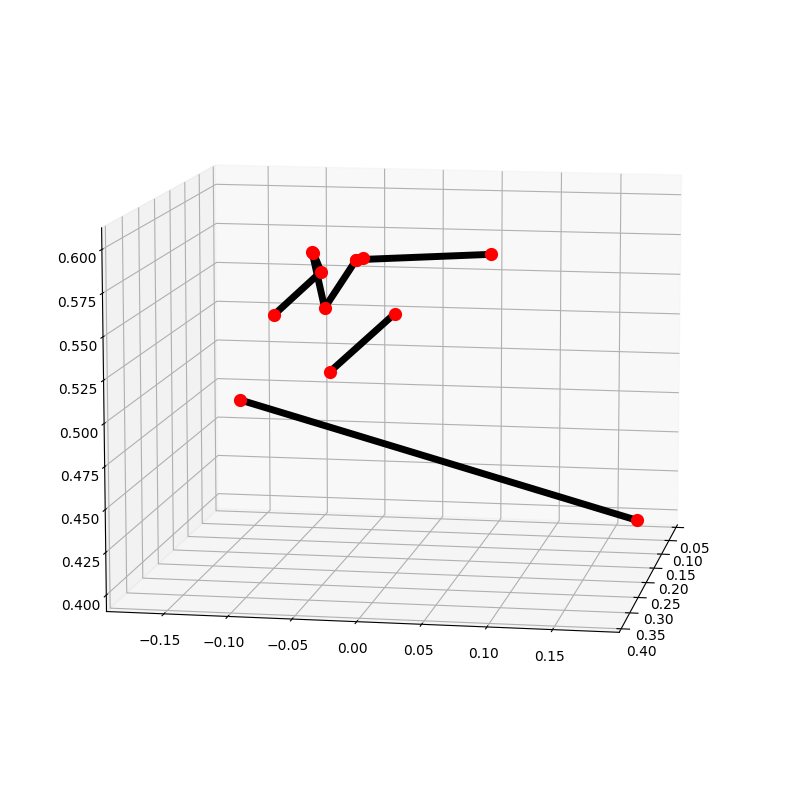

z: -1506.87255859375


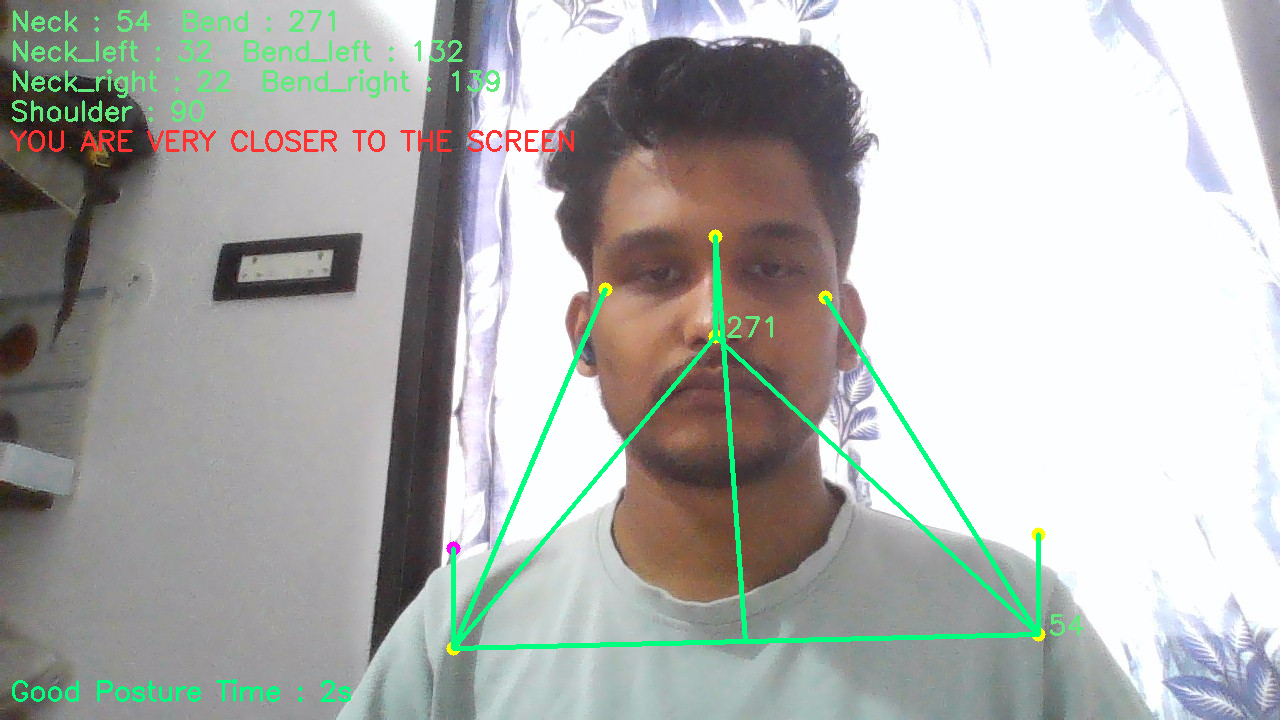

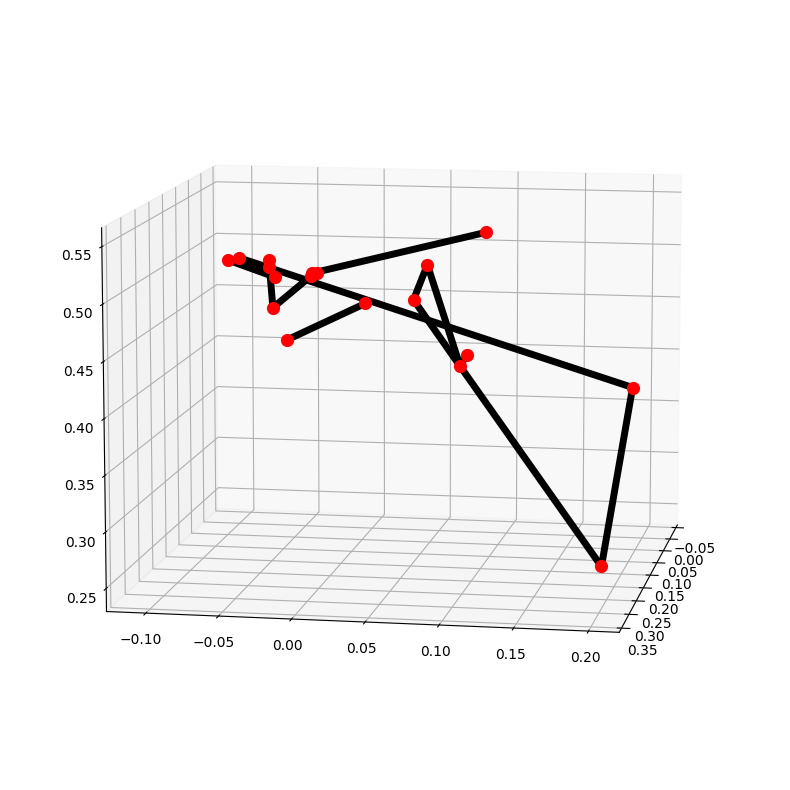

z: -918.8838195800781
YOU ARE IN WRONG POSITION FOR LONG TIME


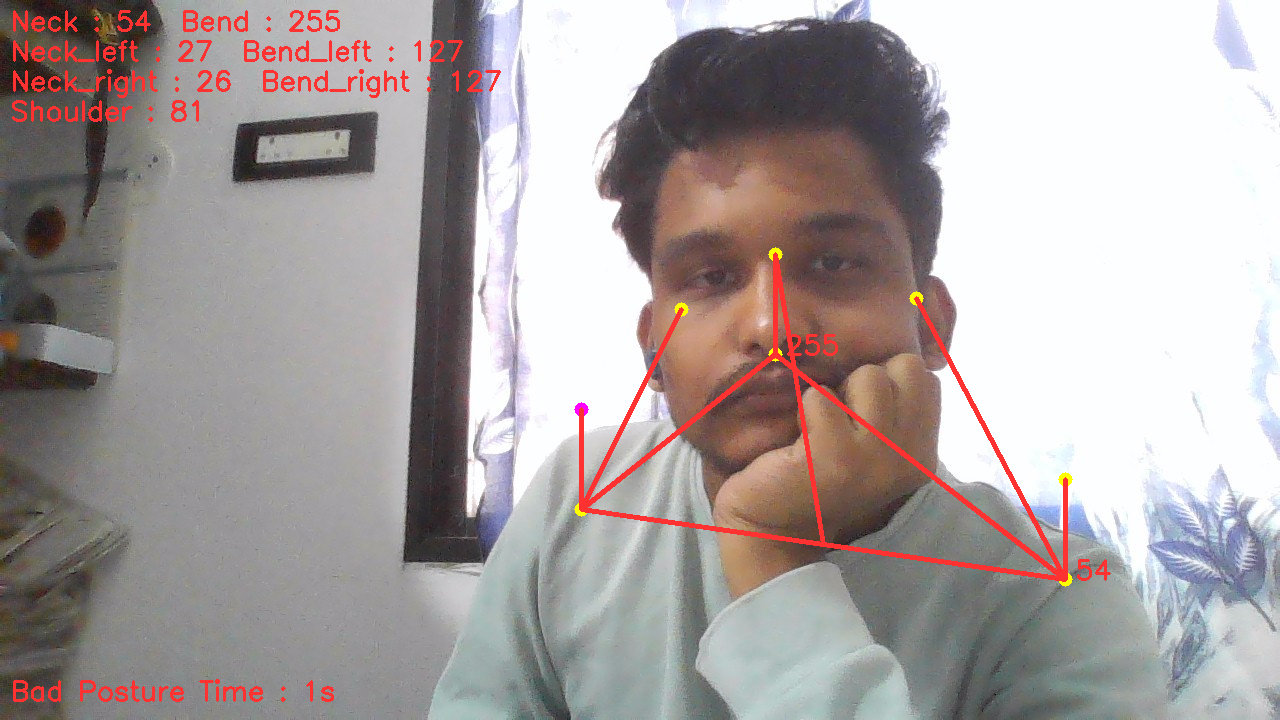

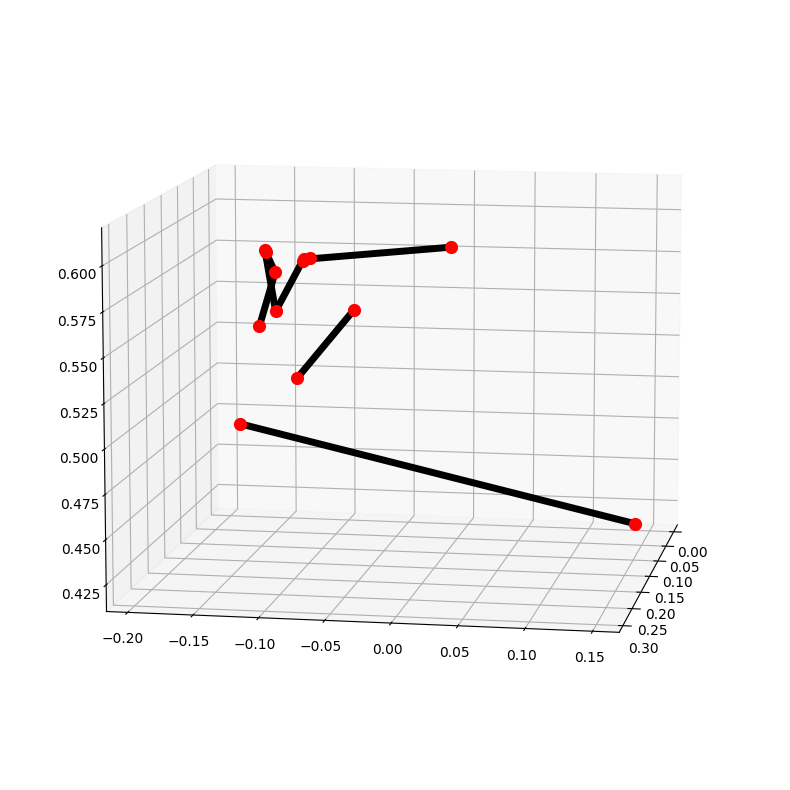

z: -562.8939056396484


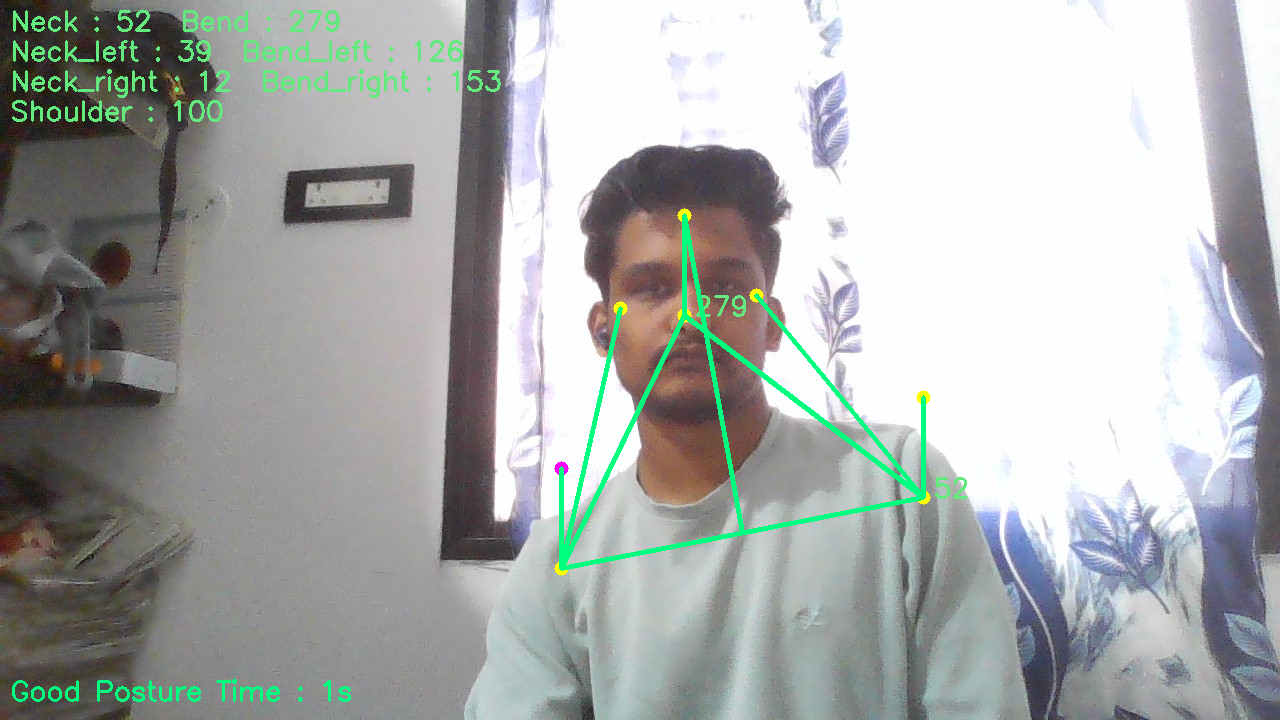

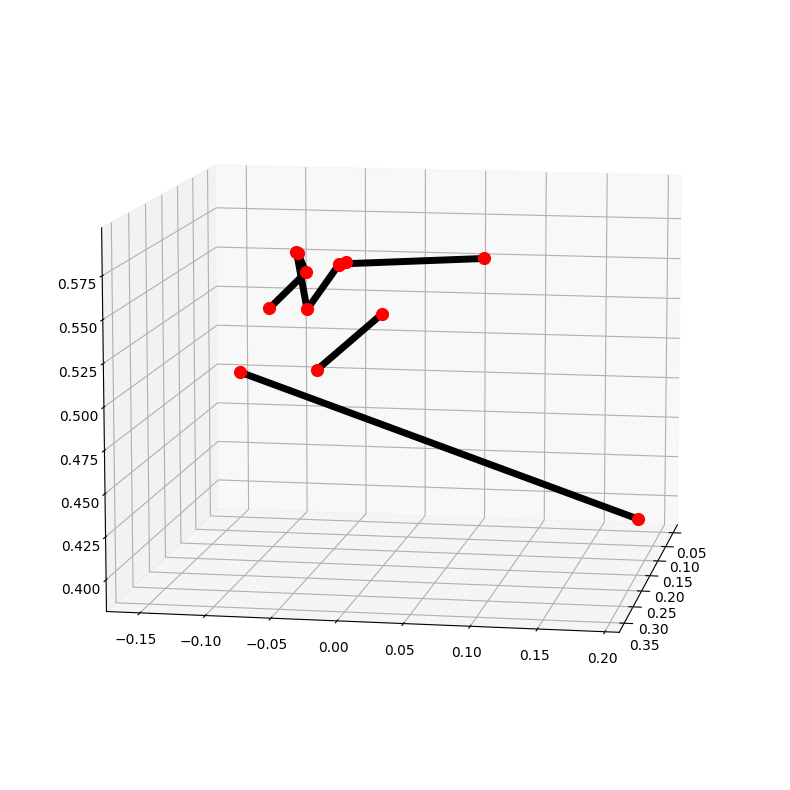

z: -997.4791717529297


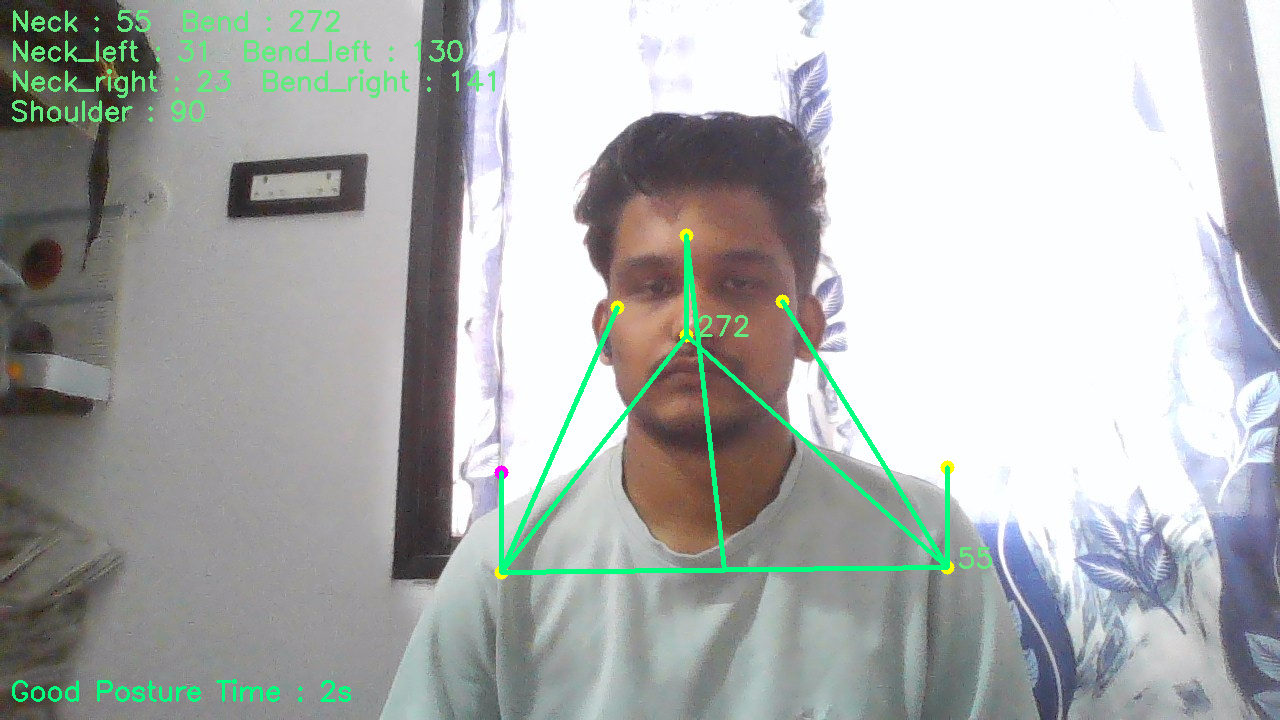

finished


In [ ]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose
# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils
BG_COLOR = (192, 192, 192) # gray
images = []
folder='/content/drive/MyDrive/img'
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for filename in os.listdir(folder):
      image = cv2.imread(os.path.join(folder,filename))
      if image is  None:
        break
  #file='/content/input.png'
      h, w = image.shape[:2]
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      keypoints = pose.process(image)

      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Use lm and lmPose as following methods.
      lm = keypoints.pose_landmarks
      lmPose = mp_pose.PoseLandmark

    # Acquire the landmark coordinates.
    # Left shoulder.
      l_shldr_x = int(lm.landmark[lmPose.LEFT_SHOULDER].x * w)
      l_shldr_y = int(lm.landmark[lmPose.LEFT_SHOULDER].y * h)
    # Right shoulder
      r_shldr_x = int(lm.landmark[lmPose.RIGHT_SHOULDER].x * w)
      r_shldr_y = int(lm.landmark[lmPose.RIGHT_SHOULDER].y * h)
    # Left ear.
      l_ear_x = int(lm.landmark[lmPose.LEFT_EAR].x * w)
      l_ear_y = int(lm.landmark[lmPose.LEFT_EAR].y * h)
    # Right ear
      r_ear_x = int(lm.landmark[lmPose.RIGHT_EAR].x * w)
      r_ear_y = int(lm.landmark[lmPose.RIGHT_EAR].y * h)
    # NOSE.
      l_nose_x = int(lm.landmark[lmPose.NOSE].x * w)
      l_nose_y = int(lm.landmark[lmPose.NOSE].y * h)
    # Calculate angles.
      l_neck_inclination = findAngle(l_shldr_x, l_shldr_y, l_ear_x, l_ear_y)
      l_bend_inclination = findAngle(l_nose_x, l_nose_y, l_shldr_x, l_shldr_y)
      r_neck_inclination = findAngle(r_shldr_x, r_shldr_y, r_ear_x, r_ear_y)
      r_bend_inclination = findAngle(l_nose_x, l_nose_y, r_shldr_x, r_shldr_y)
      shldr_inclination = findAngle(l_shldr_x, l_shldr_y, r_shldr_x, r_shldr_y)
    # Draw landmarks.
      cv2.circle(image, (l_shldr_x, l_shldr_y), 7, yellow, -1)
      cv2.circle(image, (r_shldr_x, r_shldr_y), 7, yellow, -1)
      cv2.circle(image, (l_ear_x, l_ear_y), 7, yellow, -1)
      cv2.circle(image, (r_ear_x, r_ear_y), 7, yellow, -1)
      mp_drawing.plot_landmarks(keypoints.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
      z_nose=lm.landmark[lmPose.NOSE].z * w
      print(f'z: {lm.landmark[lmPose.NOSE].z * w}')
      if z_nose < -1100:
         cv2.putText(image, 'YOU ARE VERY CLOSER TO THE SCREEN', (10, 150), font, 0.9, red, 2)

    # Let's take y - coordinate of P3 100px above x1,  for display elegance.
      cv2.circle(image, (l_shldr_x, l_shldr_y - 100), 7, yellow, -1)
      cv2.circle(image, (r_shldr_x, r_shldr_y-100), 7, pink, -1)
      cv2.circle(image, (l_nose_x, l_nose_y), 7, yellow, -1)

    # Similarly, here we are taking y - coordinate 100px above x1.
      cv2.circle(image, (l_nose_x, l_nose_y - 100), 7, yellow, -1)

    # Put text, Posture and angle inclination.
      angle_text_left = 'Neck_left : ' + str(int(l_neck_inclination)) + '  Bend_left : ' + str(int(l_bend_inclination))
      angle_text_right = 'Neck_right : ' + str(int(r_neck_inclination)) + '  Bend_right : ' + str(int(r_bend_inclination))
      angle_text_string = 'Neck : ' + str(int(l_neck_inclination+r_neck_inclination)) + '  Bend : ' + str(int(l_bend_inclination+r_bend_inclination))
      angle_text_shldr = 'Shoulder : ' + str(int(shldr_inclination))
      neck=l_neck_inclination+r_neck_inclination
      bend=l_bend_inclination+r_bend_inclination
      x_m_point = int((l_shldr_x +r_shldr_x )/2)
      y_m_point = int((l_shldr_y+r_shldr_y )/2)

    # Determine good posture or bad posture.
      if neck >= 50  and bend >=265:
         bad_frames = 0
         good_frames += 1
         cv2.putText(image, angle_text_string, (10, 30), font, 0.9, light_green, 2)
         cv2.putText(image, angle_text_left, (10, 60), font, 0.9, light_green, 2)
         cv2.putText(image, angle_text_right, (10, 90), font, 0.9, light_green, 2)
         cv2.putText(image, angle_text_shldr, (10, 120), font, 0.9, light_green, 2)
         cv2.putText(image, str(int(neck)), (l_shldr_x + 10, l_shldr_y), font, 0.9, light_green, 2)
         cv2.putText(image, str(int(bend)), (l_nose_x + 10, l_nose_y), font, 0.9, light_green, 2)

        # Join landmarks.
         cv2.line(image, (l_shldr_x, l_shldr_y), (l_ear_x, l_ear_y), green, 4)
         cv2.line(image, (l_shldr_x, l_shldr_y), (r_shldr_x, r_shldr_y), green, 4)
         cv2.line(image, (r_shldr_x, r_shldr_y), (r_ear_x, r_ear_y), green, 4)
         cv2.line(image, (l_shldr_x, l_shldr_y), (l_shldr_x, l_shldr_y - 100), green, 4)
         cv2.line(image, (r_shldr_x, r_shldr_y), (r_shldr_x, r_shldr_y - 100), green, 4)
         cv2.line(image, (l_nose_x, l_nose_y), (l_shldr_x, l_shldr_y), green, 4)
         cv2.line(image, (l_nose_x, l_nose_y), (r_shldr_x, r_shldr_y), green, 4)
         cv2.line(image, (l_nose_x, l_nose_y), (l_nose_x, l_nose_y - 100), green, 4)
         cv2.line(image, (x_m_point,y_m_point), (l_nose_x, l_nose_y - 100), green, 4)

      else:
         good_frames = 0
         bad_frames += 1

         cv2.putText(image, angle_text_string, (10, 30), font, 0.9, red, 2)
         cv2.putText(image, angle_text_left, (10, 60), font, 0.9, red, 2)
         cv2.putText(image, angle_text_right, (10, 90), font, 0.9, red, 2)
         cv2.putText(image, angle_text_shldr, (10, 120), font, 0.9, red, 2)
         cv2.putText(image, str(int(neck)), (l_shldr_x + 10, l_shldr_y), font, 0.9, red, 2)
         cv2.putText(image, str(int(bend)), (l_nose_x + 10, l_nose_y), font, 0.9, red, 2)

        # Join landmarks.
         cv2.line(image, (l_shldr_x, l_shldr_y), (l_ear_x, l_ear_y), red, 4)
         cv2.line(image, (l_shldr_x, l_shldr_y), (r_shldr_x, r_shldr_y), red, 4)
         cv2.line(image, (r_shldr_x, r_shldr_y), (r_ear_x, r_ear_y), red, 4)
         cv2.line(image, (l_shldr_x, l_shldr_y), (l_shldr_x, l_shldr_y - 100), red, 4)
         cv2.line(image, (r_shldr_x, r_shldr_y), (r_shldr_x, r_shldr_y - 100), red, 4)
         cv2.line(image, (l_nose_x, l_nose_y), (l_shldr_x, l_shldr_y), red, 4)
         cv2.line(image, (l_nose_x, l_nose_y), (r_shldr_x, r_shldr_y),red, 4)
         cv2.line(image, (l_nose_x, l_nose_y), (l_nose_x, l_nose_y - 100), red, 4)
         cv2.line(image, (x_m_point,y_m_point), (l_nose_x, l_nose_y - 100), red, 4)

   # good_time = (1 / fps) * good_frames
   # bad_time =  (1 / fps) * bad_frames
    # Pose time.
      if good_frames > 0:
         time_string_good = 'Good Posture Time : ' + str(round(good_frames, 1)) + 's'
         cv2.putText(image, time_string_good, (10, h - 20), font, 0.9, green, 2)
      else:
         time_string_bad = 'Bad Posture Time : ' + str(round(bad_frames, 1)) + 's'
         cv2.putText(image, time_string_bad, (10, h - 20), font, 0.9, red, 2)
      if bad_frames > 0:
         sendWarning()
      annotated_image = image.copy()
      cv2_imshow(annotated_image)
print('finished')